In [1]:
# Requests for handling HTTP get and other requests
import requests
import time # import for playing nice and not getting blocked
import pandas as pd
# from BeautifulSoup4 import BeatifulSoup if installed through pip install BeautifulSoup4
# 
from bs4 import BeautifulSoup

In [ ]:
# if bs4 not found install it with
#  !pip install beatifulsoup4
# https://www.crummy.com/software/BeautifulSoup/

In [ ]:
!dir
# ar ! i can run command line commands

In [2]:
# centrs = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
# url = "https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/"
url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"

In [3]:
req = requests.get(url) # so here we make a call to webpage via HTTP GET request and get something back
req.status_code # we could add if to check for 200

200

In [4]:
req.text[:200]

'<!DOCTYPE html>\r\n<HTML><HEAD>\r\n<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>\r\n<meta http-equiv="Content-Type" CONTENT="text/html; charset=UTF-8">\r\n<meta name="viewport" c'

In [5]:
req.text.count("Stabu")  # we could parse it ourselves but why bother when we have libraries ?

2

In [6]:
req.text.index("Stabu")

15720

In [7]:
type(req)

requests.models.Response

In [ ]:
# req.json() will not work since this page is not JSON!

In [8]:
req.text[req.text.index("Stabu"):req.text.index("Stabu")+100] # we could do parsing by hand but usually we want to use a premade parser

'Stabu</option><option value="5312">Strēlnieku</option><option value="5353">Tallinas</option><option '

In [9]:
# parser means structuring your text into some structure
soup = BeautifulSoup(req.text, 'lxml') # lxml is improved parser, a little bit more lenient
# soup = BeautifulSoup(req.text) # could use Python's built in HTML parser
soup.title

<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>

In [10]:
type(soup)

bs4.BeautifulSoup

In [11]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
tables = soup.find_all("table") # finds ALL elements matching our filter
len(tables) 

7

In [12]:
# find finds just one match - first that matches
# tr table row - https://developer.mozilla.org/en-US/docs/Web/HTML/Element/tr
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title

In [13]:
type(headline)

bs4.element.Tag

In [14]:
headline.text  # i could use split here but we can go deeper!

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nIelaIst.m2StāvsSērijaCena, m2Cena'

In [15]:
headline.text.split()

['Sludinājumi', 'datums', 'IelaIst.m2StāvsSērijaCena,', 'm2Cena']

In [16]:
headtds = headline.find_all("td")  # get list of all td tags inside our headline tag only(not the whole document!)
# td stands for table data
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td 
headtds

[<td class="msg_column" colspan="3" width="70%">
 <span style="float:left;"> Sludinājumi
 </span>
 <span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
 <noindex>
 <a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
 </td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title="

In [17]:
len(headtds) # so we have 8 table data elements

8

In [13]:
headline.text # this returns ALL text in headline and its children and grandchildren

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nIelaIst.m2StāvsSērijaCena, m2Cena'

In [18]:
headtds[0].text # we do not need the first one

'\n\xa0Sludinājumi\r\n\n\n\ndatums\n'

In [19]:
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']

In [20]:
# lets combine the above cells into a function which will always get us columns
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns  # merge both lists, could use extend
    return column_list

In [21]:
column_names = getColList(soup)
column_names # to be used later when creating our table

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [22]:
trows = soup.find_all('tr') # tr stands for table row
len(trows)


40

In [ ]:
# if i had no other choices I could find starting and end index by hand and hard code it
# but that is liable to change between pages

In [23]:
trows[9] # we coudl do it by hand

<tr id="tr_51168256"><td class="msga2 pp0"><input id="c51168256" name="mid[]" type="checkbox" value="51168256_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/cneim.html" id="im51168256"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/908/226879/45375682.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTg4JUEzJUFFJTlBeSVGMXMlODElODglODIlQTglQjElOTR5JUFEdCU4MCU4OSU4QiVBMCVBRiU5MnUlQTU=|RpzbEuBKU" href="/msg/lv/real-estate/flats/riga/centre/cneim.html" id="dm_51168256">Pārdodas 4 istabu dzīvoklis klusajā centrā. 

Dzīvoklis ar aug</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Vidus 11</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">134</td><td c="1" class="msga2-o pp6" nowrap="">1/5</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">2,537 €</td><td c="1" class="msga2-o pp6" nowrap="">340,000  €</td></tr>

In [24]:
trows[5] # so could take trows[6:35] downside is that this is fixed with magic numbers

<tr id="tr_51720934"><td class="msga2 pp0"><input id="c51720934" name="mid[]" type="checkbox" value="51720934_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="im51720934"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTgwJUE3ZiU5RSU3Q3AlRTklN0UlQUJpJTk5JTgyaiVBMCU4NSVBOWQlOTclODJqJTlEJTgwJUE1ZCU5Ng==|Mu4fK8m" href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="dm_51720934">Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. 
Dzīvoklis </a></div></td><td c="1" class="msga2-o pp6" nowrap="">Tallinas 52</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">59</td><td c="1" class="msga2-o pp6" nowrap="">4/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">2,364 €</td><td c="1" class="msga2-o pp6" nowrap="">139,500  €</td></tr>

In [25]:
trows[9]["id"], trows[5].get("id") # get is safer since not all elements have ids

('tr_51168256', 'tr_51720934')

In [26]:
# hardest part in this 
# how to filter only specific rows
# we need to find something that is unique to our apartment rows but not to the extra rows
# remember we id is not guaranteed, so "" gives us default value when there is no id
apt_rows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
len(apt_rows)

30

In [27]:
apt_rows[-1]

<tr id="tr_51604109"><td class="msga2 pp0"><input id="c51604109" name="mid[]" type="checkbox" value="51604109_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/hhbfi.html" id="im51604109"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/942/235401/47080123.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="aSU4MSVBMiU4MiU5MyVCRCU5QyU3RSVBOWglODIlQTAlODMlOUJxJTlFJTgwJUFCZyU3RSVBMiU3RSU5MnE=|6NpNbAkHu" href="/msg/lv/real-estate/flats/riga/centre/hhbfi.html" id="dm_51604109">Pārdodam lielisku dzīvokli klusā pilsētas centrā. Zaļš rajons. L</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Eksporta 10</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">48</td><td c="1" class="msga2-o pp6" nowrap="">2/5</td><td c="1" class="msga2-o pp6" nowrap="">Staļina</td><td c="1" class="msga2-o pp6" nowrap="">1,563 €</td><td c="1" class="msga2-o pp6" nowrap="">75,000  €</td></tr>

In [28]:
apt_rows[0]

<tr id="tr_51720934"><td class="msga2 pp0"><input id="c51720934" name="mid[]" type="checkbox" value="51720934_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="im51720934"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTgwJUE3ZiU5RSU3Q3AlRTklN0UlQUJpJTk5JTgyaiVBMCU4NSVBOWQlOTclODJqJTlEJTgwJUE1ZCU5Ng==|Mu4fK8m" href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="dm_51720934">Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. 
Dzīvoklis </a></div></td><td c="1" class="msga2-o pp6" nowrap="">Tallinas 52</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">59</td><td c="1" class="msga2-o pp6" nowrap="">4/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">2,364 €</td><td c="1" class="msga2-o pp6" nowrap="">139,500  €</td></tr>

In [29]:
# lets make a function from the above doodle and make it work on most pages on SS
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [30]:
apt_rows = getRowList(soup)
len(apt_rows)

30

In [31]:
first_ad = apt_rows[0]
first_ad

<tr id="tr_51720934"><td class="msga2 pp0"><input id="c51720934" name="mid[]" type="checkbox" value="51720934_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="im51720934"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTgwJUE3ZiU5RSU3Q3AlRTklN0UlQUJpJTk5JTgyaiVBMCU4NSVBOWQlOTclODJqJTlEJTgwJUE1ZCU5Ng==|Mu4fK8m" href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="dm_51720934">Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. 
Dzīvoklis </a></div></td><td c="1" class="msga2-o pp6" nowrap="">Tallinas 52</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">59</td><td c="1" class="msga2-o pp6" nowrap="">4/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">2,364 €</td><td c="1" class="msga2-o pp6" nowrap="">139,500  €</td></tr>

In [32]:
row_tds = first_ad.find_all('td') # get all table data elements from first ad/row
len(row_tds)

10

In [33]:
row_tds

[<td class="msga2 pp0"><input id="c51720934" name="mid[]" type="checkbox" value="51720934_1106_0"/></td>,
 <td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="im51720934"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/></a></td>,
 <td class="msg2"><div class="d1"><a class="am" data="JTgwJUE3ZiU5RSU3Q3AlRTklN0UlQUJpJTk5JTgyaiVBMCU4NSVBOWQlOTclODJqJTlEJTgwJUE1ZCU5Ng==|Mu4fK8m" href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="dm_51720934">Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. 
 Dzīvoklis </a></div></td>,
 <td c="1" class="msga2-o pp6" nowrap="">Tallinas 52</td>,
 <td c="1" class="msga2-o pp6" nowrap="">2</td>,
 <td c="1" class="msga2-o pp6" nowrap="">59</td>,
 <td c="1" class="msga2-o pp6" nowrap="">4/5</td>,
 <td c="1" class="msga2-o pp6" nowrap="">P. kara</td>,
 <td c="1" class="msga2-o pp6" nowrap="">2,364 €</td>,
 <td c="1" class="msga2-o pp6" nowrap="">139,500  €</td>]

In [34]:
row_tds[0].text

''

In [35]:
row_tds[1].text

''

In [36]:
row_tds[1].attrs # we can see elements attributes

{'class': ['msga2']}

In [37]:
img = row_tds[1].find("img")
img

<img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/>

In [38]:
img.get("src")

'https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg'

In [39]:
a = row_tds[1].find('a') # a tag is called anchor tag
a

<a href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="im51720934"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/></a>

In [40]:
a.attrs

{'href': '/msg/lv/real-estate/flats/riga/centre/ajcbf.html',
 'id': 'im51720934'}

In [41]:
a.get('href'), a['href']

('/msg/lv/real-estate/flats/riga/centre/ajcbf.html',
 '/msg/lv/real-estate/flats/riga/centre/ajcbf.html')

In [42]:
prefix = "https://www.ss.com"
prefix + a.get('href')

'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/ajcbf.html'

In [43]:
row_tds[2].text # 3rd element has the description

'Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. \r\nDzīvoklis '

In [44]:
row_tds[-1].text # last element has the price

'139,500  €'

In [45]:
column_names # we got these first

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [46]:
# from row get dictionary with values 
def getRow(row, colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    # we start with description
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    # then url
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [47]:
apt_rows[0] # first row of ads

<tr id="tr_51720934"><td class="msga2 pp0"><input id="c51720934" name="mid[]" type="checkbox" value="51720934_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="im51720934"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/5/952/237988/47597527.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTgwJUE3ZiU5RSU3Q3AlRTklN0UlQUJpJTk5JTgyaiVBMCU4NSVBOWQlOTclODJqJTlEJTgwJUE1ZCU5Ng==|Mu4fK8m" href="/msg/lv/real-estate/flats/riga/centre/ajcbf.html" id="dm_51720934">Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. 
Dzīvoklis </a></div></td><td c="1" class="msga2-o pp6" nowrap="">Tallinas 52</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">59</td><td c="1" class="msga2-o pp6" nowrap="">4/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">2,364 €</td><td c="1" class="msga2-o pp6" nowrap="">139,500  €</td></tr>

In [48]:
getRow(apt_rows[0])

{'description': 'Pārdodu skaistu un mājīgu 2 istabu dzīvokli Centrā. \r\nDzīvoklis ',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/ajcbf.html',
 'Iela': 'Tallinas 52',
 'Ist.': '2',
 'm2': '59',
 'Stāvs': '4/5',
 'Sērija': 'P. kara',
 'Cena, m2': '2,364 €',
 'Cena': '139,500  €'}

In [48]:
getRow(first_ad)

{'description': 'Unikāls, pilnībā aprīkots 4-istabu dzīvoklis fasādes ēkā Rīgas c',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/fdebl.html',
 'Iela': 'Skolas 14',
 'Ist.': '4',
 'm2': '169',
 'Stāvs': '6/6',
 'Sērija': 'Renov.',
 'Cena, m2': '1,953 €',
 'Cena': '330,000  €'}

In [49]:
# so if we know how to work on single row then we can do process multiple rows
def getRows(rowlist, colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist] # so return a list of dictionaries


In [50]:
row_ads = getRows(apt_rows)
row_ads[-3:] # last 3 ads

[{'description': 'Attīstītājs piedāvā trīs istabu dzīvokli pilnībā rekonstruētā ēk',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/adixk.html',
  'Iela': 'Birznieka-Upīša 10..',
  'Ist.': '3',
  'm2': '64',
  'Stāvs': '1/6',
  'Sērija': 'Renov.',
  'Cena, m2': '2,157 €',
  'Cena': '138,030  €'},
 {'description': 'Īpašnieks pārdod unikālu mansarda dzīvokli ar panorāmas logiem u',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/flgxe.html',
  'Iela': 'Cēsu 43',
  'Ist.': '2',
  'm2': '83',
  'Stāvs': '6/6',
  'Sērija': 'P. kara',
  'Cena, m2': '1,916 €',
  'Cena': '159,000  €'},
 {'description': 'Pārdodam lielisku dzīvokli klusā pilsētas centrā. Zaļš rajons. L',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/hhbfi.html',
  'Iela': 'Eksporta 10',
  'Ist.': '2',
  'm2': '48',
  'Stāvs': '2/5',
  'Sērija': 'Staļina',
  'Cena, m2': '1,563 €',
  'Cena': '75,000  €'}]

In [51]:
type(row_ads)  # list of dictionaries for each ad

list

In [ ]:
# such a list of dictionaries is easy to convert into a DataFrame in pandas

In [52]:
dtemp = pd.DataFrame(row_ads, columns=column_names)
dtemp.shape

(30, 9)

In [53]:
dtemp.head()

description  \
0  Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1  Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2  Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3  Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
4  Pārdodas 4 istabu dzīvoklis klusajā centrā. \r...   

                                                 url          Iela Ist.   m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...   Tallinas 52    2   59   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...    Matīsa 89a    2   41   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...       Čaka 70    6  180   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 108    2   50   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Vidus 11    4  134   

  Stāvs   Sērija Cena, m2        Cena  
0   4/5  P. kara  2,364 €  139,500  €  
1   3/5  P. kara  1,902 €   78,000  €  
2   3/6  P. kara  1,389 €  250,000  €  
3   6/6  P. kara  1,700 €   85,000  €  
4   1/5   Renov.  2,537 €  340,000  €

In [54]:
dtemp.to_excel("rigas_rajons_jun29.xlsx")

In [55]:
# so with this function I can get full dataframe from a single page on ss.com not only apartments
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows_dict = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows_dict, columns=column_names)
    

In [56]:
centrs = url
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [57]:
imanta = "https://www.ss.com/lv/real-estate/flats/riga/imanta/sell/"
idf = getDFfromURL(imanta)
idf.head()

description  \
0  Владелец без посредников продаёт квартиру. Ква...   
1  Владелец продаёт трёхкомнатную квартиру в ново...   
2  Pārdodam gaišu un koptu 3- istabu dzīvokli Ima...   
3  Продаётся дизайнерская трёх комнатная квартира...   
4  Продается светлая, теплая, неугловая квартира ...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/i...  Kurzemes pr. 108    2   
1  https://ss.com/msg/lv/real-estate/flats/riga/i...      Kleistu 11k1    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/i...     Rigondas g. 6    3   
3  https://ss.com/msg/lv/real-estate/flats/riga/i...       Dumbrāja 18    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/i...   Kurzemes pr. 98    2   

   m2  Stāvs    Sērija Cena, m2        Cena  
0  48    5/5  LT proj.  1,081 €   51,900  €  
1  75  11/12     Jaun.  1,880 €  141,000  €  
2  64    9/9      602.  1,559 €   99,750  €  
3  80    4/5     Jaun.  2,750 €  220,000  €  
4  53    6/9      602.  1,557 €   82,500  €

In [50]:
df = getDFfromURL(centrs) # this will involve calling web page

In [55]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [53]:
df = getDFfromURL(url)
df.shape

(30, 9)

In [51]:
df.shape

(30, 9)

In [57]:
df.head()

description  \
0  Pārdošanā plaša un mājīga divu stāvu māja ļoti...   
1  Tiek pārdota omulīga privātmāja Gaujā. Ir veik...   
2  Pārdodu zemes gabala domājamo daļu 750 kv. m. ...   
3  Kārtīgi celta māja ar sakoptu dārzu un siltumn...   
4  Pārdod māju Katlakalnā. Māja atrodas lieliskā ...   

                                                 url                 Pagasts  \
0  https://ss.com/msg/lv/real-estate/homes-summer...                 Sigulda   
1  https://ss.com/msg/lv/real-estate/homes-summer...    Carnikavas nov.Gauja   
2  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
3  https://ss.com/msg/lv/real-estate/homes-summer...              Saulkrasti   
4  https://ss.com/msg/lv/real-estate/homes-summer...  Ķekavas pag.Katlakalns   

    m2 Stāvi Zem. pl.        Cena  
0  480     3  1928 m²  250,000  €  
1  210     2  1000 m²  160,000  €  
2  203     2   750 m²  135,000  €  
3   85     2   580 m²   46,800  €  
4  278     2  1200 m²  265,000  €

In [58]:

# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a
anchors = soup.find_all("a")
len(anchors) # anchors are popular in pages

99

In [59]:
anchors[:5]

[<a href="/" title="Sludinājumi"><img alt="Sludinājumi" border="0" class="page_header_logo" src="https://i.ss.com/img/p.gif"/></a>,
 <a class="a_menu" href="/lv/real-estate/homes-summer-residences/new/" title="Iesniegt Sludinājumu">Iesniegt Sludinājumu</a>,
 <a class="a_menu" href="/lv/login/" title="Mani Sludinājumi">Mani Sludinājumi</a>,
 <a class="a_menu" href="/lv/real-estate/homes-summer-residences/riga-region/search/" title="Meklēt sludinājumus">Meklēšana</a>,
 <a class="a_menu" href="/lv/favorites/" title="Memo">Memo</a>]

In [59]:
navs = [anchor for anchor in anchors if anchor.get("name") == "nav_id"] # get will get us None if no "name" exists
len(navs)

10

In [60]:
navs

[<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page23.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page2.html" name="nav_id" rel="next">2</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page3.html" name="nav_id" rel="next">3</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page4.html" name="nav_id" rel="next">4</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page5.html" name="nav_id" rel="next">5</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page6.html" name="nav_id" rel="next">6</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page7.html" name="nav_id" rel="next">7</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page8.html" name="nav_id" rel="next">8</a>,
 <a class="navi" href="/lv/real-est

In [61]:
navs[0]

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page23.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [62]:
navs[0].attrs

{'name': 'nav_id',
 'rel': ['prev'],
 'class': ['navi'],
 'href': '/lv/real-estate/flats/riga/centre/sell/page23.html'}

In [63]:
navs[0]['href']

'/lv/real-estate/flats/riga/centre/sell/page23.html'

In [64]:
# could use regular expression here but we can use split 
afterpage = navs[0]['href'].split("/page")[-1] # -1 might be safer than 1 in case there is region with name page
afterpage

'23.html'

In [65]:
beforedot = afterpage.split(".html")[0]
beforedot

'23'

In [66]:
lastpage = int(beforedot)
lastpage

23

In [ ]:
# so now wbe put everything we just did in a single function

In [67]:
prevanchor = soup.find('a', {"rel":"prev"})
prevanchor

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page23.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [68]:
def getAllLocalUrls(url):
    """Get a list of all urls including paginated pages"""
    results = [url] # default is just the url if no extra pages found, teiksim Bolderājai...
    req = requests.get(url)
    if req.status_code != 200:
        print(f"Bad response! {req.status_code}")
        return []
    soup = BeautifulSoup(req.text, 'lxml')
    # we just need a one element
    prevanchor = soup.find('a', {"rel":"prev"}) # find finds first match only
    if prevanchor == None: # means there is only one page of ads
        return results
    href = prevanchor.attrs.get('href')
    lastPageNum = int(href.split('/page')[-1].split('.html')[0])
    print("Last page is",lastPageNum)
    nurls = [f"{url}page{n}.html" for n in range(2,lastPageNum+1)]
    results += nurls
    return results

In [69]:
url

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [70]:
centrs = url

In [71]:
url

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [71]:
local_urls = getAllLocalUrls(url)
len(local_urls),local_urls[:3],local_urls[-1]

Last page is 22


(22,
 ['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html'],
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page22.html')

In [72]:
local_urls

['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page12.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page13.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page14.html

In [73]:
dlast = getDFfromURL(local_urls[-1])
dlast.shape

(30, 9)

In [74]:
dlast

description  \
0   Tiek pārdots pilnībā mēbelēts studijas tipa dz...   
1   Gaumīgi iekārtots dzīvoklis, ļoti labā stāvokl...   
2   Pārdod siltu 2 - istabu dzīvokli lieliskā atra...   
3   Autostāvvieta ēkas pagalmā. Dzīvoklis Rīgas ce...   
4   Хорошая возможность устроить 3х комнатную квар...   
5   Pārdodam modernu dzīvokli klusā ielā Rīgas cen...   
6   Tiek pārdots dzīvokli Dzirnavu ielā 6 A. Dzīvo...   
7   Pārdodam 3-ist. dzīvokli otrajā stāvā pašā Rīg...   
8   Renovēta pirmskara māja Rīgas centrā, 4 istabu...   
9   Remontēts 2 - istabu dzīvoklis pirmskara pagal...   
10  Īpašnieks pārdod 2 istabu dzīvokli Staļina lai...   
11  Jūgendstila pērle Rīgas vēsturiskajā centrā, a...   
12  Mājīgs, divu līmeņu trīsistabu dzīvoklis pašā ...   
13  Prestižajā Rīgas centrā tiek pārdots 3 istabu ...   
14  Beautiful apartment for sale in city centre. \...   
15  Pārdošanā trīsistabu dzīvoklis pilnībā rekonst...   
16  Īpašnieks pārdod 2 istabu dzīvokli Vārnu ielā....   
17  Augstvērtīgs 5 istabu dzīvoklis ar divām autos...   
18  Gaišas plašas biroju telpas 1 un 2 stāvā dzīvo...   
19  Atīsttīstītājs pārdod divistabu dzīvokli jauna...   
20  Atīsttīstītājs pārdod trīsistabu dzīvokli jaun...   
21  Vienas istabas dzīvoklis ar pelēko apdari reno...   
22  Ekskluzīvs 4-istabu dzīvoklis vēstniecību rajo...   
23  Pārdod plašu un saulainu 3 istabu dzīvokli pil...   
24  Dzīvoklis prestižā vietā - pretī Latvijas Naci...   
25  Pārdod 1-istabu dzīvokli ar labu plānojumu Maz...   
26  Brīnišķīgs plašs un kvalitatīvs trīsistabu dzī...   
27  Dažu minūšu gājiena attālumā no Vecrīgas pārdo...   
28  Fasādes māja, balkons, autostāvvieta. \r\n\r\n...   
29  4 bedroom apartment for sale in Embassy area\r...   

                                                  url              Iela Ist.  \
0   https://ss.com/msg/lv/real-estate/flats/riga/c...        Klijānu 10    1   
1   https://ss.com/msg/lv/real-estate/flats/riga/c...          Vidus 11    3   
2   https://ss.com/msg/lv/real-estate/flats/riga/c...       Visvalža 3b    2   
3   https://ss.com/msg/lv/real-estate/flats/riga/c...       Pērnavas 10    3   
4   https://ss.com/msg/lv/real-estate/flats/riga/c...         Matīsa 89    3   
5   https://ss.com/msg/lv/real-estate/flats/riga/c...          Ieroču 4    1   
6   https://ss.com/msg/lv/real-estate/flats/riga/c...        Dzirnavu 6    3   
7   https://ss.com/msg/lv/real-estate/flats/riga/c...       Dzirnavu 89    3   
8   https://ss.com/msg/lv/real-estate/flats/riga/c...          Čaka 143    4   
9   https://ss.com/msg/lv/real-estate/flats/riga/c...          Miera 10    2   
10  https://ss.com/msg/lv/real-estate/flats/riga/c...    Katrīnas d. 22    2   
11  https://ss.com/msg/lv/real-estate/flats/riga/c...       Lāčplēša 23    6   
12  https://ss.com/msg/lv/real-estate/flats/riga/c...         Barona 39    3   
13  https://ss.com/msg/lv/real-estate/flats/riga/c...        Vesetas 32    3   
14  https://ss.com/msg/lv/real-estate/flats/riga/c...      Pērnavas 15A    1   
15  https://ss.com/msg/lv/real-estate/flats/riga/c...     Antonijas 26A    3   
16  https://ss.com/msg/lv/real-estate/flats/riga/c...          Vārnu 8B    2   
17  https://ss.com/msg/lv/real-estate/flats/riga/c...       J. Daliņa 8    5   
18  https://ss.com/msg/lv/real-estate/flats/riga/c...    Katrīnas d. 17    5   
19  https://ss.com/msg/lv/real-estate/flats/riga/c...          Stabu 87    2   
20  https://ss.com/msg/lv/real-estate/flats/riga/c...          Stabu 87    3   
21  https://ss.com/msg/lv/real-estate/flats/riga/c...           Čaka 33    1   
22  https://ss.com/msg/lv/real-estate/flats/riga/c...  Kalpaka bulv. 10    4   
23  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 45    3   
24  https://ss.com/msg/lv/real-estate/flats/riga/c...    Raiņa bulv. 21    2   
25  https://ss.com/msg/lv/real-estate/flats/riga/c...       M. Matīsa 3    1   
26  https://ss.com/msg/lv/real-estate/flats/riga/c...      Grostonas 25    3   
27  https://ss.com/msg/lv/real-est

In [75]:
def get_all_ads_df(start_url, save_excel_path=None):
    df_list=[] # so we will save our dataframes in a list
    local_urls = getAllLocalUrls(start_url)
    for url in local_urls:
        print(f"Gathering data from {url}")
        df_list.append(getDFfromURL(url))
        time.sleep(0.3) # we need this to play nice! to avoid rate limit or IP ban!!
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    big_df = pd.concat(df_list, ignore_index=True) # then make a big dataframe from all the small dataframes
    if save_excel_path:
        big_df.to_excel(save_excel_path)
    return big_df
    

In [77]:
centrs = url
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [76]:
centra_df = get_all_ads_df(centrs, save_excel_path="centrs_dzivokli_junijs29.xlsx")

Last page is 22
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [77]:
centra_df.head(10)

description  \
0  Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1  Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2  Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3  Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
4  Pārdodas 4 istabu dzīvoklis klusajā centrā. \r...   
5  Продается хорошая квартира со всем душ туалет ...   
6  Pārdod plašu un elegantu dzīvokli klusā pagalm...   
7  Mājīgs, silts un kluss picis istabu dzīvoklis ...   
8  Steidzami. Оriģināls divu līmeņu dzīvoklis, kl...   
9  Pārdod plašu dzīvokli Rīgas Klusajā centrā Pul...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...      Tallinas 52    2   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Matīsa 89a    2   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...          Čaka 70    6   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...     Maskavas 108    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...         Vidus 11    4   
5  https://ss.com/msg/lv/real-estate/flats/riga/c...        Lienes 6a    1   
6  https://ss.com/msg/lv/real-estate/flats/riga/c...     Maiznīcas 10    4   
7  https://ss.com/msg/lv/real-estate/flats/riga/c...     Valdemāra 39    5   
8  https://ss.com/msg/lv/real-estate/flats/riga/c...          Čaka 44    2   
9  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 8    5   

    m2 Stāvs   Sērija Cena, m2        Cena  
0   59   4/5  P. kara  2,364 €  139,500  €  
1   41   3/5  P. kara  1,902 €   78,000  €  
2  180   3/6  P. kara  1,389 €  250,000  €  
3   50   6/6  P. kara  1,700 €   85,000  €  
4  134   1/5   Renov.  2,537 €  340,000  €  
5   25   1/1   Renov.  1,000 €   25,000  €  
6  105   3/5  P. kara  2,076 €  218,000  €  
7  109   2/6  P. kara  1,651 €  180,000  €  
8   97   2/5  P. kara  1,031 €  100,000  €  
9  163   3/6  P. kara  2,362 €  385,000  €

In [72]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [74]:
riga_region = get_all_ads_df(url, "riga_region_sep28.xlsx")

Last page is 17
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page9.html
Gath

In [75]:
riga_region.shape

(506, 7)

In [76]:
riga_region.head(10)

description  \
0  Pārdošanā plaša un mājīga divu stāvu māja ļoti...   
1  Tiek pārdota omulīga privātmāja Gaujā. Ir veik...   
2  Pārdodu zemes gabala domājamo daļu 750 kv. m. ...   
3  Kārtīgi celta māja ar sakoptu dārzu un siltumn...   
4  Pārdod māju Katlakalnā. Māja atrodas lieliskā ...   
5  Дом у озера в Букулты на продажу\r\n\r\nПланир...   
6  Дом в Суниши. \r\nНаходится в частной, закрыто...   
7  Brīnišķīgs īpašums, pašā Mārupes sirdī, grezna...   
8  Tiek pārdota kapitāli un rūpīgi būvēta privātm...   
9  Mājīgs īpašums Dreiliņos - rindu mājā, kas noz...   

                                                 url                 Pagasts  \
0  https://ss.com/msg/lv/real-estate/homes-summer...                 Sigulda   
1  https://ss.com/msg/lv/real-estate/homes-summer...    Carnikavas nov.Gauja   
2  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
3  https://ss.com/msg/lv/real-estate/homes-summer...              Saulkrasti   
4  https://ss.com/msg/lv/real-estate/homes-summer...  Ķekavas pag.Katlakalns   
5  https://ss.com/msg/lv/real-estate/homes-summer...   Garkalnes nov.Bukulti   
6  https://ss.com/msg/lv/real-estate/homes-summer...    Garkalnes nov.Sunīši   
7  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
8  https://ss.com/msg/lv/real-estate/homes-summer...      Babītes pag.Spilve   
9  https://ss.com/msg/lv/real-estate/homes-summer...    Stopiņu nov.Dreiliņi   

    m2 Stāvi Zem. pl.        Cena  
0  480     3  1928 m²  250,000  €  
1  210     2  1000 m²  160,000  €  
2  203     2   750 m²  135,000  €  
3   85     2   580 m²   46,800  €  
4  278     2  1200 m²  265,000  €  
5  590     3  1900 m²  349,000  €  
6  192     2  1346 m²  315,000  €  
7  226     2  1352 m²  490,000  €  
8  199     1  1573 m²  300,000  €  
9  221     2   626 m²  230,000  €

In [77]:
riga_region.tail(10)

description  \
16  Продается двухэтажный кирпичный дом с ухоженны...   
17  Pārdodu kvalitatīvu, skaistu un ļoti siltu māj...   
18  Продается новостройка в стадии строительства -...   
19  Pārdošanā mājīgs īpašums privātmāju ciematā "P...   
20  Pārdod mūsdienīgu energoefektīvu privātmāju ar...   
21  Lat: Laba vasarnīca labā vietā, netālu no Rīga...   
22  Расположен в 10 км от Юрмалы, 7 км от аэропорт...   
23  Īpašnieks pārdod privātmāju ar kopējo platību ...   
24  Pārdod zemi ar mājiņu, kurā ir ievikts ūdens, ...   
25  Dzīvojamā māja ar baseinu un savu dīķi klusā v...   

                                                  url  \
16  https://ss.com/msg/lv/real-estate/homes-summer...   
17  https://ss.com/msg/lv/real-estate/homes-summer...   
18  https://ss.com/msg/lv/real-estate/homes-summer...   
19  https://ss.com/msg/lv/real-estate/homes-summer...   
20  https://ss.com/msg/lv/real-estate/homes-summer...   
21  https://ss.com/msg/lv/real-estate/homes-summer...   
22  https://ss.com/msg/lv/real-estate/homes-summer...   
23  https://ss.com/msg/lv/real-estate/homes-summer...   
24  https://ss.com/msg/lv/real-estate/homes-summer...   
25  https://ss.com/msg/lv/real-estate/homes-summer...   

                    Pagasts   m2 Stāvi  Zem. pl.        Cena  
16     Inčukalna nov.Egļupe  112     2    643 m²   36,000  €  
17   Olaines pag.Jaunolaine  240     2    900 m²  239,000  €  
18  Salaspils l. t.Piķurgas   78     1   1200 m²   78,000  €  
19  Garkalnes nov.Upesciems  153     1   1045 m²  261,700  €  
20     Stopiņu nov.Vālodzes  235     2   1000 m²  390,000  €  
21  Saulkrastu l. t.Priedes  100     2    600 m²   28,000  €  
22       Babītes pag.Liberi  520     4   1861 m²  440,000  €  
23   Salaspils l. t.Pikalne   99     1    352 m²   77,000  €  
24     Inčukalna nov.Egļupe   25     1  16000 m²   35,000  €  
25  Carnikavas nov.Kalngale  494     3   2400 m²  290,000  €

In [73]:
agens = "https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/"
df = get_all_ads_df(agens, "agens_27_09.xlsx")
df.head()

Last page is 3
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page3.html


description  \
0  In a prestigious new building, with an excelle...   
1  Pārdod divistabu dzīvokli Āgenskalnā. Pie māja...   
2  Pārdod vienistabas dzīvokli Āgenskalnā, pretīm...   
3  Steidzami tiek pārdots 2-istabas dzīvoklis. \r...   
4  Pārdod jauku un mājīgu 2 istabu dzīvokli Āgens...   

                                                 url          Iela Ist.  m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/a...  Kalnciema 9a    3  84   
1  https://ss.com/msg/lv/real-estate/flats/riga/a...  Raņķa d. 7/3    2  42   
2  https://ss.com/msg/lv/real-estate/flats/riga/a...  Ventspils 25    1  24   
3  https://ss.com/msg/lv/real-estate/flats/riga/a...       Auces 3    2  47   
4  https://ss.com/msg/lv/real-estate/flats/riga/a...  Ventspils 13    2  50   

  Stāvs   Sērija Cena, m2        Cena  
0  4/10    Jaun.  2,101 €  176,500  €  
1   1/5   Hrušč.  1,512 €   63,500  €  
2   2/2  P. kara    496 €   11,900  €  
3   3/3  P. kara  2,085 €   98,000  €  
4   1/5  P. kara    800 €   40,000  €

In [80]:
centra_df.shape

(715, 9)

In [78]:
df = centra_df  # alias
df.shape

(660, 9)

In [79]:
df.shape

(660, 9)

In [80]:
df.columns

Index(['description', 'url', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija',
       'Cena, m2', 'Cena'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  660 non-null    object
 1   url          660 non-null    object
 2   Iela         660 non-null    object
 3   Ist.         660 non-null    object
 4   m2           660 non-null    object
 5   Stāvs        660 non-null    object
 6   Sērija       660 non-null    object
 7   Cena, m2     660 non-null    object
 8   Cena         660 non-null    object
dtypes: object(9)
memory usage: 46.5+ KB


In [75]:
df = get_all_ads_df(centrs, "centrs_27_09.xlsx")

Last page is 21
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [67]:
df = centra_df

In [68]:
df.shape

(596, 9)

In [85]:
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena  
0  120   3/5  P. kara  2,417 €  290,000  €  
1  169   6/6   Renov.  1,953 €  330,000  €  
2  141   6/6    Jaun.  2,376 €  335,000  €  
3   42   1/6   Renov.  1,857 €   78,000  €  
4  173   3/6  P. kara  1,179 €  204,000  €

In [78]:
df.tail()

description  \
25  Супер предложение Продает хозяин самая дешёвая...   
26  Tiek pārdots 3 - istabu dzīvoklis renovētā māj...   
27  Pārdod gaišu studijas tipa vienistabas dzīvokl...   
28  Продается светлая, солнечная 3 комнатная кварт...   
29  Pārdodu nevis stūra, sausu un siltu 2 istabu d...   

                                                  url            Iela Ist.  \
25  https://ss.com/msg/lv/real-estate/flats/riga/c...       Ausekļa 5    5   
26  https://ss.com/msg/lv/real-estate/flats/riga/c...   Elizabetes 22    3   
27  https://ss.com/msg/lv/real-estate/flats/riga/c...       Vagonu 24    1   
28  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 93    3   
29  https://ss.com/msg/lv/real-estate/flats/riga/c...  Lāčplēša 62/66    2   

     m2 Stāvs   Sērija Cena, m2        Cena  
25  162   2/6   Renov.  2,222 €  360,000  €  
26   72   4/6   Renov.  2,486 €  179,000  €  
27   29   2/2  P. kara    931 €   27,000  €  
28   65   5/7    Jaun.  2,262 €  147,000  €  
29   50   3/5  P. kara  1,220 €   60,980  €

In [ ]:
df.shape

In [82]:
#we can do more post processing - feature engineering using existing columns
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.head()

description  \
0  Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1  Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2  Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3  Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
4  Pārdodas 4 istabu dzīvoklis klusajā centrā. \r...   

                                                 url          Iela Ist.   m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...   Tallinas 52    2   59   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...    Matīsa 89a    2   41   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...       Čaka 70    6  180   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 108    2   50   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Vidus 11    4  134   

  Stāvs   Sērija Cena, m2        Cena Floor MaxFloor  
0   4/5  P. kara  2,364 €  139,500  €     4        5  
1   3/5  P. kara  1,902 €   78,000  €     3        5  
2   3/6  P. kara  1,389 €  250,000  €     3        6  
3   6/6  P. kara  1,700 €   85,000  €     6        6  
4   1/5   Renov.  2,537 €  340,000  €     1        5

In [78]:
df = riga_region # just a shortcut

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 2
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  693 non-null    object
 1   url          693 non-null    object
 2   Iela         693 non-null    object
 3   Ist.         693 non-null    object
 4   m2           693 non-null    object
 5   Stāvs        693 non-null    object
 6   Sērija       693 non-null    object
 7   Cena, m2     693 non-null    object
 8   Cena         693 non-null    object
 9   Floor        693 non-null    object
 10  MaxFloor     693 non-null    object
dtypes: object(11)
memory usage: 65.0+ KB


In [87]:
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor  
0  120   3/5  P. kara  2,417 €  290,000  €     3        5  
1  169   6/6   Renov.  1,953 €  330,000  €     6        6  
2  141   6/6    Jaun.  2,376 €  335,000  €     6        6  
3   42   1/6   Renov.  1,857 €   78,000  €     1        6  
4  173   3/6  P. kara  1,179 €  204,000  €     3        6

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  715 non-null    object
 1   url          715 non-null    object
 2   Iela         715 non-null    object
 3   Ist.         715 non-null    object
 4   m2           715 non-null    object
 5   Stāvs        715 non-null    object
 6   Sērija       715 non-null    object
 7   Cena, m2     715 non-null    object
 8   Cena         715 non-null    object
 9   Floor        715 non-null    object
 10  MaxFloor     715 non-null    object
dtypes: object(11)
memory usage: 61.6+ KB


In [83]:
df["price"] = df.Cena.str.split(' ').str[0]  # create a new column from price
df.head()

description  \
0  Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1  Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2  Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3  Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
4  Pārdodas 4 istabu dzīvoklis klusajā centrā. \r...   

                                                 url          Iela Ist.   m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...   Tallinas 52    2   59   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...    Matīsa 89a    2   41   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...       Čaka 70    6  180   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 108    2   50   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Vidus 11    4  134   

  Stāvs   Sērija Cena, m2        Cena Floor MaxFloor    price  
0   4/5  P. kara  2,364 €  139,500  €     4        5  139,500  
1   3/5  P. kara  1,902 €   78,000  €     3        5   78,000  
2   3/6  P. kara  1,389 €  250,000  €     3        6  250,000  
3   6/6  P. kara  1,700 €   85,000  €     6        6   85,000  
4   1/5   Renov.  2,537 €  340,000  €     1        5  340,000

In [84]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer int64 for larger
df.head()

description  \
0  Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1  Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2  Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3  Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
4  Pārdodas 4 istabu dzīvoklis klusajā centrā. \r...   

                                                 url          Iela Ist.   m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...   Tallinas 52    2   59   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...    Matīsa 89a    2   41   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...       Čaka 70    6  180   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 108    2   50   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Vidus 11    4  134   

  Stāvs   Sērija Cena, m2        Cena Floor MaxFloor   price  
0   4/5  P. kara  2,364 €  139,500  €     4        5  139500  
1   3/5  P. kara  1,902 €   78,000  €     3        5   78000  
2   3/6  P. kara  1,389 €  250,000  €     3        6  250000  
3   6/6  P. kara  1,700 €   85,000  €     6        6   85000  
4   1/5   Renov.  2,537 €  340,000  €     1        5  340000

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  660 non-null    object
 1   url          660 non-null    object
 2   Iela         660 non-null    object
 3   Ist.         660 non-null    object
 4   m2           660 non-null    object
 5   Stāvs        660 non-null    object
 6   Sērija       660 non-null    object
 7   Cena, m2     660 non-null    object
 8   Cena         660 non-null    object
 9   Floor        660 non-null    object
 10  MaxFloor     660 non-null    object
 11  price        660 non-null    int32 
dtypes: int32(1), object(11)
memory usage: 59.4+ KB


In [86]:
df["floor"] = df.Floor.astype('int32')

In [87]:
df.m2 = df.m2.astype('int32')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  660 non-null    object
 1   url          660 non-null    object
 2   Iela         660 non-null    object
 3   Ist.         660 non-null    object
 4   m2           660 non-null    int32 
 5   Stāvs        660 non-null    object
 6   Sērija       660 non-null    object
 7   Cena, m2     660 non-null    object
 8   Cena         660 non-null    object
 9   Floor        660 non-null    object
 10  MaxFloor     660 non-null    object
 11  price        660 non-null    int32 
 12  floor        660 non-null    int32 
dtypes: int32(3), object(10)
memory usage: 59.4+ KB


In [89]:
df.MaxFloor = df.MaxFloor.astype('int32')
df.head()

description  \
0  Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1  Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2  Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3  Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
4  Pārdodas 4 istabu dzīvoklis klusajā centrā. \r...   

                                                 url          Iela Ist.   m2  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...   Tallinas 52    2   59   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...    Matīsa 89a    2   41   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...       Čaka 70    6  180   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 108    2   50   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Vidus 11    4  134   

  Stāvs   Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
0   4/5  P. kara  2,364 €  139,500  €     4         5  139500      4  
1   3/5  P. kara  1,902 €   78,000  €     3         5   78000      3  
2   3/6  P. kara  1,389 €  250,000  €     3         6  250000      3  
3   6/6  P. kara  1,700 €   85,000  €     6         6   85000      6  
4   1/5   Renov.  2,537 €  340,000  €     1         5  340000      1

In [96]:
df.head()

description  \
0  Tiek pārdots gaumīgs dzīvoklis centrā ar savu ...   
1  Unikāls, pilnībā aprīkots 4-istabu dzīvoklis f...   
2  Pārdod 4-istabu dzīvokli Klusajā centrā ar aut...   
3  Komfortabls dzīvoklis . Atjaunota renovēta māj...   
4  Plašs, renovējams 6 istabu dzīvoklis iekšpagal...   

                                                 url             Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...    Bruņinieku 28    4   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...        Skolas 14    4   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...  Rūpniecības 34A    4   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...        Miera 105    2   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Brīvības 72    6   

    m2 Stāvs   Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
0  120   3/5  P. kara  2,417 €  290,000  €     3         5  290000      3  
1  169   6/6   Renov.  1,953 €  330,000  €     6         6  330000      6  
2  141   6/6    Jaun.  2,376 €  335,000  €     6         6  335000      6  
3   42   1/6   Renov.  1,857 €   78,000  €     1         6   78000      1  
4  173   3/6  P. kara  1,179 €  204,000  €     3         6  204000      3

In [90]:
sorted_df = df.sort_values(by="price",ascending=False)
sorted_df.head()

description  \
249  Ekskluzīvs dzīvoklis vienā no nozīmīgākajiem a...   
314  Piedāvājam iegādei plašu un mūsdienīgu 4-istab...   
106  Pārdod gaišu un plašu četru istabu dzīvokli Rī...   
239  Pārdošanā ir ļoti plašs 4 istabu dzīvoklis ska...   
192  6 istabu dzīvoklis elitārākajā Rīgas pilsētas ...   

                                                   url           Iela Ist.  \
249  https://ss.com/msg/lv/real-estate/flats/riga/c...   Elizabetes 3    6   
314  https://ss.com/msg/lv/real-estate/flats/riga/c...    Lāčplēša 11    4   
106  https://ss.com/msg/lv/real-estate/flats/riga/c...  Elizabetes 12    4   
239  https://ss.com/msg/lv/real-estate/flats/riga/c...      Pumpura 5    4   
192  https://ss.com/msg/lv/real-estate/flats/riga/c...   Elizabetes 4    6   

      m2 Stāvs  Sērija  Cena, m2          Cena Floor  MaxFloor    price  floor  
249  145   2/5  Renov.  10,172 €  1,475,000  €     2         5  1475000      2  
314  197   6/7   Jaun.   4,076 €    802,880  €     6         7   802880      6  
106  181   4/5  Renov.   4,004 €    724,800  €     4         5   724800      4  
239  280   2/6  Renov.   2,500 €    700,000  €     2         6   700000      2  
192  212   2/5  Renov.   3,278 €    695,000  €     2         5   695000      2

In [91]:
df.sort_values(by="price",ascending=True).head()

description  \
383  Bildes vairāk what upā, katru dienu nebraucam ...   
331  Zemes nomas maksa 10 Eur/mēnesī, koka māja, pa...   
115  Продается квартира со свежим ремонтом. \r\n\r\...   
439  Pārdod kompaktu dzīvokli Grīziņkalnā. Platība ...   
306  Продается квартира со свежим ремонтом. \r\n\r\...   

                                                   url         Iela Ist.  m2  \
383  https://ss.com/msg/lv/real-estate/flats/riga/c...    Duntes 26    3  67   
331  https://ss.com/msg/lv/real-estate/flats/riga/c...  Zvaigžņu 15    1  19   
115  https://ss.com/msg/lv/real-estate/flats/riga/c...  Zvaigžņu 31    1  22   
439  https://ss.com/msg/lv/real-estate/flats/riga/c...      Vārnu 4    1  18   
306  https://ss.com/msg/lv/real-estate/flats/riga/c...  Zvaigžņu 31    1  22   

    Stāvs   Sērija Cena, m2       Cena Floor  MaxFloor  price  floor  
383   2/2  Specpr.    177 €  11,890  €     2         2  11890      2  
331   2/2  P. kara    832 €  15,800  €     2         2  15800      2  
115   2/3  P. kara    805 €  17,700  €     2         3  17700      2  
439   2/2  P. kara  1,000 €  18,000  €     2         2  18000      2  
306   2/3  P. kara    818 €  18,000  €     2         3  18000      2

In [92]:
df.describe()

m2    MaxFloor         price       floor
count   660.000000  660.000000  6.600000e+02  660.000000
mean     80.309091    5.589394  1.651072e+05    3.289394
std      61.597141    2.420112  1.295011e+05    2.220653
min      10.000000    1.000000  1.189000e+04    1.000000
25%      47.000000    5.000000  8.130000e+04    2.000000
50%      66.000000    5.000000  1.300000e+05    3.000000
75%     100.000000    6.000000  2.107250e+05    5.000000
max    1000.000000   24.000000  1.475000e+06   20.000000

In [93]:
df[df.floor > 2]

description  \
0    Pārdodu skaistu un mājīgu 2 istabu dzīvokli Ce...   
1    Pārdošanā tikko izremontēts lielisks, gaišs 2i...   
2    Pārdodas plašs dzīvoklis Rīgā. \r\n\r\nDzīvokl...   
3    Pārdodu divistabu dzīvokli Maskavas ielā 108\r...   
6    Pārdod plašu un elegantu dzīvokli klusā pagalm...   
..                                                 ...   
653  Pārdod plašu un saulainu 3 istabu dzīvokli pil...   
655  Pārdod 1-istabu dzīvokli ar labu plānojumu Maz...   
656  Brīnišķīgs plašs un kvalitatīvs trīsistabu dzī...   
657  Dažu minūšu gājiena attālumā no Vecrīgas pārdo...   
658  Fasādes māja, balkons, autostāvvieta. \r\n\r\n...   

                                                   url          Iela Ist.  \
0    https://ss.com/msg/lv/real-estate/flats/riga/c...   Tallinas 52    2   
1    https://ss.com/msg/lv/real-estate/flats/riga/c...    Matīsa 89a    2   
2    https://ss.com/msg/lv/real-estate/flats/riga/c...       Čaka 70    6   
3    https://ss.com/msg/lv/real-estate/flats/riga/c...  Maskavas 108    2   
6    https://ss.com/msg/lv/real-estate/flats/riga/c...  Maiznīcas 10    4   
..                                                 ...           ...  ...   
653  https://ss.com/msg/lv/real-estate/flats/riga/c...   Baznīcas 45    3   
655  https://ss.com/msg/lv/real-estate/flats/riga/c...   M. Matīsa 3    1   
656  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3   
657  https://ss.com/msg/lv/real-estate/flats/riga/c...   Eksporta 16    1   
658  https://ss.com/msg/lv/real-estate/flats/riga/c...     Ausekļa 3    4   

      m2  Stāvs   Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
0     59    4/5  P. kara  2,364 €  139,500  €     4         5  139500      4  
1     41    3/5  P. kara  1,902 €   78,000  €     3         5   78000      3  
2    180    3/6  P. kara  1,389 €  250,000  €     3         6  250000      3  
3     50    6/6  P. kara  1,700 €   85,000  €     6         6   85000      6  
6    105    3/5  P. kara  2,076 €  218,000  €     3         5  218000      3  
..   ...    ...      ...      ...         ...   ...       ...     ...    ...  
653   84    4/6  P. kara  2,083 €  175,000  €     4         6  175000      4  
655   29    4/5  P. kara  1,103 €   32,000  €     4         5   32000      4  
656   99  18/24    Jaun.  3,475 €  344,000  €    18        24  344000     18  
657   31    3/5   Hrušč.  1,645 €   51,000  €     3         5   51000      3  
658  108    5/5  P. kara  2,407 €  260,000  €     5         5  260000      5  

[375 rows x 13 columns]

In [94]:
df.sort_values(by="MaxFloor",ascending=False).head()

description  \
473  Прекрасная просторная и качественная трехкомна...   
656  Brīnišķīgs plašs un kvalitatīvs trīsistabu dzī...   
89   Unikāls īpašums pilsētvides, lieliska skata un...   
647  Augstvērtīgs 5 istabu dzīvoklis ar divām autos...   
260  Квартира по индивидуальной планировке(изменени...   

                                                   url          Iela Ist.  \
473  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    3   
656  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3   
89   https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    3   
647  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    5   
260  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    4   

      m2  Stāvs Sērija Cena, m2        Cena Floor  MaxFloor   price  floor  
473  125   3/24  Jaun.  1,744 €  218,000  €     3        24  218000      3  
656   99  18/24  Jaun.  3,475 €  344,000  €    18        24  344000     18  
89   137  18/24  Jaun.  2,956 €  405,000  €    18        24  405000     18  
647  200  20/24  Jaun.  3,000 €  600,000  €    20        24  600000     20  
260  130  15/24  Jaun.  2,846 €  370,000  €    15        24  370000     15

In [95]:
df.head()

description  \
0  Pārdošanā plaša un mājīga divu stāvu māja ļoti...   
1  Tiek pārdota omulīga privātmāja Gaujā. Ir veik...   
2  Pārdodu zemes gabala domājamo daļu 750 kv. m. ...   
3  Kārtīgi celta māja ar sakoptu dārzu un siltumn...   
4  Pārdod māju Katlakalnā. Māja atrodas lieliskā ...   

                                                 url                 Pagasts  \
0  https://ss.com/msg/lv/real-estate/homes-summer...                 Sigulda   
1  https://ss.com/msg/lv/real-estate/homes-summer...    Carnikavas nov.Gauja   
2  https://ss.com/msg/lv/real-estate/homes-summer...      Mārupes pag.Mārupe   
3  https://ss.com/msg/lv/real-estate/homes-summer...              Saulkrasti   
4  https://ss.com/msg/lv/real-estate/homes-summer...  Ķekavas pag.Katlakalns   

    m2 Stāvi Zem. pl.        Cena   price  floor  
0  480     3  1928 m²  250,000  €  250000      3  
1  210     2  1000 m²  160,000  €  160000      2  
2  203     2   750 m²  135,000  €  135000      2  
3   85     2   580 m²   46,800  €   46800      2  
4  278     2  1200 m²  265,000  €  265000      2

In [95]:
df.columns

Index(['description', 'url', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija',
       'Cena, m2', 'Cena', 'Floor', 'MaxFloor', 'price', 'floor'],
      dtype='object')

In [96]:
grouped_by_street = df.groupby(by="Iela")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_street

count     min     max      mean
Iela                                             
13. janvāra 21        1  195000  195000  195000.0
Alauksta 12           1   34900   34900   34900.0
Alauksta 9            1  149500  149500  149500.0
Alunāna 6             1  320000  320000  320000.0
Alūksnes 3            1  197000  197000  197000.0
...                 ...     ...     ...       ...
Ģertrūdes 78          1  105000  105000  105000.0
Ģertrūdes 9           1  565000  565000  565000.0
Ģertrūdes 91          1   25000   25000   25000.0
Ģertrūdes 99          1   55000   55000   55000.0
Ģertrūdes 99 k-2      1   45579   45579   45579.0

[435 rows x 4 columns]

In [97]:
grouped_by_floor = df.groupby(by="floor")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_floor

count     min      max           mean
floor                                       
1        120   19000   369000  106966.058333
2        165   11890  1475000  177266.551515
3        126   27500   463000  154161.753968
4         77   32000   724800  196743.103896
5         95   25000   439000  159828.547368
6         59   36000   802880  209719.610169
7          6   67000   595000  239783.333333
8          2   99000    99000   99000.000000
10         2  135000   142300  138650.000000
11         1   92000    92000   92000.000000
12         1  129700   129700  129700.000000
15         2  370000   420390  395195.000000
18         2  344000   405000  374500.000000
19         1  480000   480000  480000.000000
20         1  600000   600000  600000.000000

In [87]:
len(grouped_by_floor)

14

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'min'}>],
       [<AxesSubplot:title={'center':'max'}>,
        <AxesSubplot:title={'center':'mean'}>]], dtype=object)

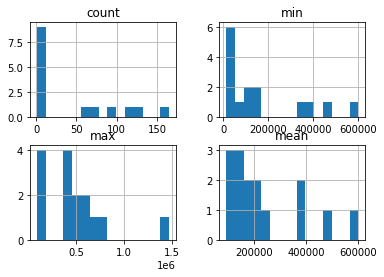

In [98]:
grouped_by_floor.hist(bins=len(grouped_by_floor))

In [96]:
grouped_by_pag = df.groupby(by="Pagasts")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_pag

count     min     max           mean
Pagasts                                                      
-                            1  144000  144000  144000.000000
Allažu pag.Allažmuiža        1   90000   90000   90000.000000
Allažu pag.Egļupe            1   18500   18500   18500.000000
Babītes pag.Babīte           3  140000  500000  330000.000000
Babītes pag.Brīvkalni        1  301000  301000  301000.000000
...                        ...     ...     ...            ...
Ķekavas pag.Odukalns         2  134000  250000  192000.000000
Ķekavas pag.Plakanciems      2   35000   55000   45000.000000
Ķekavas pag.Rāmava           3  215000  300000  253333.333333
Ķekavas pag.Vimbukrogs       1  235000  235000  235000.000000
Ķekavas pag.Ķekava           5   69900  299000  207280.000000

[113 rows x 4 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD3AEB59A0>,
      dtype=object)

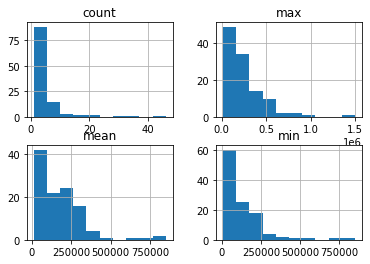

In [100]:
grouped_by_pag.hist()

In [101]:
grouped_by_pag.plot(x="Pagasts", y="mean")

KeyError: 'Pagasts'

In [ ]:
df.to_excel("c:/temp/my_apartments.xlsx") # i could this with absolute path

In [ ]:
from datetime import datetime as dt
now = dt.now()
now.month, now.day, now.hour, now.second

In [ ]:
# url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
url = centrs
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"
save_path

In [ ]:
url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"

df = get_all_ads_df(url, save_path)

In [ ]:
url = "https://www.ss.com/lv/transport/cars/vaz/riga_f/"
df = get_all_ads_df(url, "../data/vaz_18_03.xlsx")

# TODO 
# Try with different starting address not only centrs
## Maybe combine regions
## See how it would work with maybe cars
## Data engineering make new columns based on existing ones, clean some columns
### Changing floors 2/6 to columns 2 and 6, clean up Euro signs
## Sorting, Describing, Grouping by regions etc

In [ ]:
df = pd.read_excel("centrs_10_03.xlsx")
df.head()

In [83]:
df.shape

(630, 11)

In [84]:
df["price"] = df.Cena.str.split(' ').str[0]
df.head()

description  \
0  Augstas kvalitātes Jūgendstila dizaina dzīvokl...   
1  Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...   
2  Par samazinātu cenu, ar apgrūtinājumiem, īpašn...   
3  Продаю отремонтированную, полностью меблирован...   
4  Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 11    3   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 13    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ganību d. 13    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...       Hospitāļu 7    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Jēkaba 26/28    1   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor    price  
0   90   3/5  P. kara  2,889 €  260,000  €     3        5  260,000  
1  126   5/6  P. kara  2,302 €  290,000  €     5        6  290,000  
2   39   2/6    Jaun.  1,603 €   62,500  €     2        6   62,500  
3   69   1/5  Specpr.  1,348 €   93,000  €     1        5   93,000  
4   54   4/5   Renov.  1,667 €   90,000  €     4        5   90,000

In [85]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
df.head()

description  \
0  Augstas kvalitātes Jūgendstila dizaina dzīvokl...   
1  Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...   
2  Par samazinātu cenu, ar apgrūtinājumiem, īpašn...   
3  Продаю отремонтированную, полностью меблирован...   
4  Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 11    3   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 13    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ganību d. 13    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...       Hospitāļu 7    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Jēkaba 26/28    1   

    m2 Stāvs   Sērija Cena, m2        Cena Floor MaxFloor   price  
0   90   3/5  P. kara  2,889 €  260,000  €     3        5  260000  
1  126   5/6  P. kara  2,302 €  290,000  €     5        6  290000  
2   39   2/6    Jaun.  1,603 €   62,500  €     2        6   62500  
3   69   1/5  Specpr.  1,348 €   93,000  €     1        5   93000  
4   54   4/5   Renov.  1,667 €   90,000  €     4        5   90000

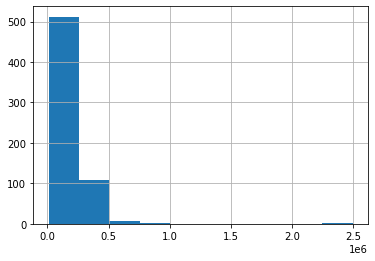

In [86]:
df.price.hist()

In [ ]:
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.info()

In [87]:
#typecasting example
df.Floor = df.Floor.astype('int32')
df.MaxFloor = df.MaxFloor.astype('int32')

In [88]:
df.head()

description  \
0  Augstas kvalitātes Jūgendstila dizaina dzīvokl...   
1  Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...   
2  Par samazinātu cenu, ar apgrūtinājumiem, īpašn...   
3  Продаю отремонтированную, полностью меблирован...   
4  Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...   

                                                 url              Iela Ist.  \
0  https://ss.com/msg/lv/real-estate/flats/riga/c...  Pulkv. Brieža 11    3   
1  https://ss.com/msg/lv/real-estate/flats/riga/c...       Baznīcas 13    3   
2  https://ss.com/msg/lv/real-estate/flats/riga/c...      Ganību d. 13    2   
3  https://ss.com/msg/lv/real-estate/flats/riga/c...       Hospitāļu 7    3   
4  https://ss.com/msg/lv/real-estate/flats/riga/c...      Jēkaba 26/28    1   

    m2 Stāvs   Sērija Cena, m2        Cena  Floor  MaxFloor   price  
0   90   3/5  P. kara  2,889 €  260,000  €      3         5  260000  
1  126   5/6  P. kara  2,302 €  290,000  €      5         6  290000  
2   39   2/6    Jaun.  1,603 €   62,500  €      2         6   62500  
3   69   1/5  Specpr.  1,348 €   93,000  €      1         5   93000  
4   54   4/5   Renov.  1,667 €   90,000  €      4         5   90000

In [89]:
d23 = df[df.MaxFloor > 20]
d23

description  \
26  Pārdodas plašs, ekskluzīvs dzīvoklis ar unikāl...   
3   Divistabu dzīvoklis projektā “Skanstes virsotn...   
29  Для ценителей просторного жилья, предлагается ...   
25  Tiek pārdots gaišs un mājīgs 3 istabu dzīvokli...   
12  Īpašnieks pārdod siltu, gaišu un plašu dzīvokl...   
20  Tiek pārdots gaišs un mājīgs 3 istabu dzīvokli...   
8   Ideālais dzīvoklis Tev un tavai ģimenei. Mūsdi...   
6   Pārdod plašu 4 istabu dzīvokli Skankstes kvart...   

                                                  url          Iela Ist.   m2  \
26  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    3  167   
3   https://ss.com/msg/lv/real-estate/flats/riga/c...   Skanstes 29    2   68   
29  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    4  170   
25  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3  109   
12  https://ss.com/msg/lv/real-estate/flats/riga/c...   J. Daliņa 8    4  130   
20  https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    3  109   
8   https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    4  112   
6   https://ss.com/msg/lv/real-estate/flats/riga/c...  Grostonas 25    4  112   

    Stāvs Sērija Cena, m2        Cena  Floor  MaxFloor   price  
26  20/22  Jaun.  4,491 €  750,000  €     20        22  750000  
3   12/24  Jaun.  2,147 €  145,999  €     12        24  145999  
29  20/24  Jaun.  4,412 €  750,000  €     20        24  750000  
25  14/24  Jaun.  2,339 €  255,000  €     14        24  255000  
12  15/24  Jaun.  2,692 €  350,000  €     15        24  350000  
20  14/24  Jaun.  2,477 €  270,000  €     14        24  270000  
8   11/23  Jaun.  2,850 €  319,200  €     11        23  319200  
6   11/23  Jaun.  2,850 €  319,200  €     11        23  319200

In [90]:
df.describe().T # T is for transposing rows and columns

count           mean            std     min      25%       50%  \
Floor     630.0       3.446032       2.242694     1.0      2.0       3.0   
MaxFloor  630.0       5.688889       2.505645     1.0      5.0       5.0   
price     630.0  167000.236508  150570.766354  8701.0  78000.0  135000.0   

               75%        max  
Floor          5.0       20.0  
MaxFloor       6.0       24.0  
price     219810.0  2500000.0

In [91]:
df.describe().T.to_csv("center_stats.csv")

In [102]:
import plotly.express as px

In [105]:
fig = px.histogram(df, x="price", nbins=100)
fig.show()

In [94]:
import seaborn as sns # seaborn sits on top of matplotlib with better defaults
import matplotlib.pyplot as plt


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  630 non-null    object
 1   url          630 non-null    object
 2   Iela         630 non-null    object
 3   Ist.         630 non-null    object
 4   m2           630 non-null    object
 5   Stāvs        630 non-null    object
 6   Sērija       630 non-null    object
 7   Cena, m2     630 non-null    object
 8   Cena         630 non-null    object
 9   Floor        630 non-null    int32 
 10  MaxFloor     630 non-null    int32 
 11  price        630 non-null    int32 
dtypes: int32(3), object(9)
memory usage: 56.6+ KB


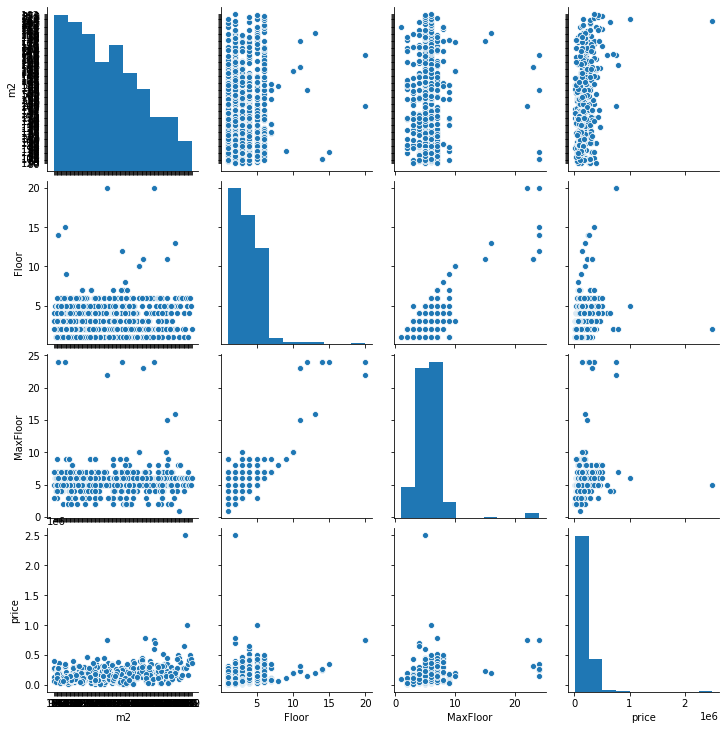

In [96]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
volvo_url = "https://www.ss.com/lv/transport/cars/volvo/sell/"
volvos = get_all_ads_df(volvo_url, "../data/volvo_03_18.xlsx")

In [97]:
volvos = pd.read_excel("volvo_270921.xlsx")
volvos.head()

Unnamed: 0                                        description  \
0           0  Auto arī dzīvē tāds kā bildēs. Virsbūve ļoti l...   
1           1  Auto labā tehniskā un vizuālā stāvoklī, auto i...   
2           2  Volvo XC 90 2.4 D5 Edition 147 KW / Webasto / ...   
3           3  Tikko No Vacijas. Facelift Modelis. Mehaniska ...   
4           4  Volvo V70 Facelift, viens no labākajiem un jau...   

                                                 url Modelis  Gads Tilp.  \
0  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2002  2.4D   
1  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2003  2.4D   
2  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2011  2.0D   
3  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2010  2.4D   
4  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2007  2.4D   

     Nobrauk.       Cena  
0  330 tūkst.   2,300  €  
1  390 tūkst.   2,600  €  
2  235 tūkst.  12,490  €  
3           -  11,650  €  
4  300 tūkst.   3,500  €

In [ ]:
volvos.shape

In [ ]:
volvos.head(10)

In [ ]:
gr_auto['Price'] = 

In [98]:
volvos["price"] = volvos.Cena.str.split(' ').str[0]
volvos.price = volvos.price.str.replace(",","").astype('int32')
volvos.head()

Unnamed: 0                                        description  \
0           0  Auto arī dzīvē tāds kā bildēs. Virsbūve ļoti l...   
1           1  Auto labā tehniskā un vizuālā stāvoklī, auto i...   
2           2  Volvo XC 90 2.4 D5 Edition 147 KW / Webasto / ...   
3           3  Tikko No Vacijas. Facelift Modelis. Mehaniska ...   
4           4  Volvo V70 Facelift, viens no labākajiem un jau...   

                                                 url Modelis  Gads Tilp.  \
0  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2002  2.4D   
1  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2003  2.4D   
2  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2011  2.0D   
3  https://ss.com/msg/lv/transport/cars/volvo/xc9...   XC 90  2010  2.4D   
4  https://ss.com/msg/lv/transport/cars/volvo/v70...     V70  2007  2.4D   

     Nobrauk.       Cena  price  
0  330 tūkst.   2,300  €   2300  
1  390 tūkst.   2,600  €   2600  
2  235 tūkst.  12,490  €  12490  
3           -  11,650  €  11650  
4  300 tūkst.   3,500  €   3500

In [99]:

gr_auto = volvos.groupby(["Gads","Modelis"])["price"].agg(["count", "min", "max", "mean", ])  #.head(n = 10)
gr_auto

count    min    max     mean
Gads Modelis                              
1987 240          1   4700   4700   4700.0
1989 740          1   4499   4499   4499.0
1990 460          1   1500   1500   1500.0
     740          1   3250   3250   3250.0
1992 740          1   1300   1300   1300.0
...             ...    ...    ...      ...
2019 XC 40        3  29900  34590  32560.0
     XC 60        3  28880  37500  33760.0
     XC 90        1  47990  47990  47990.0
2020 S60          1  27900  27900  27900.0
     S90          1  40490  40490  40490.0

[178 rows x 4 columns]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(0).str.contains("2015")] # how to filter multi level index

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")].to_excel("S60.xlsx")

In [ ]:
print(dt.today())

In [ ]:
suzuki_url = "https://www.ss.com/lv/transport/cars/suzuki/"
# sdf = get_all_ads_df(suzuki_url, f"suzuki_{dt.today()}.xlsx")
sdf = get_all_ads_df(suzuki_url, f"suzuki.xlsx")
sdf.head()

In [ ]:
sdf.info()

In [ ]:
sdf["Tilp."] = sdf["Tilp."].str.replace("\w","", regex=True)
sdf.head()

In [ ]:
sdf["Nobrauk."] = sdf["Nobrauk."].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf["Cena"] = sdf["Cena"].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf = sdf.dropna(how="any", axis=0)
sdf

In [ ]:
sdf = sdf[sdf["Nobrauk."].str.len() > 0] # got rid of those empty rows finally
sdf

In [ ]:
sdf["Cena"] = sdf["Cena"].astype("float32")

In [ ]:
gr_auto = sdf.groupby(["Gads","Modelis"])["Cena"].agg(["count","min", "max", "mean"]) 
gr_auto